A notebook for processing flat field data for each channel of OROS (the OROCHI Simulator).

# Process Overview

- load flat-field images
- average frames from different spectralon positions
- look for convergence toward mean pixel values
    - by plotting the mean change-in-mean across all pixels
    - i.e. change in mean is this abs(mean - last mean) - pixel wise
    - mean of this over all pixels shows how this changes for the repeat images.
- save final flat field

# Set up

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from pathlib import Path
import orochi_sim_proc as osp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Processing

First we load all of the frames, and show the average final frame, and noise, for each channel.

../data/flat_field_dark_20062023/0_850
Loaded 25 images (ave) for: 0 (850 nm)
Loaded 1 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
../data/flat_field_dark_20062023/1_475
Loaded 25 images (ave) for: 1 (475 nm)
Loaded 1 images (ave) for: 1 (475 nm)
Subtracting dark frame for: 1 (475 nm)
../data/flat_field_dark_20062023/2_400
Loaded 25 images (ave) for: 2 (400 nm)
Loaded 1 images (ave) for: 2 (400 nm)
Subtracting dark frame for: 2 (400 nm)
../data/flat_field_dark_20062023/3_550
Loaded 25 images (ave) for: 3 (550 nm)
Loaded 1 images (ave) for: 3 (550 nm)
Subtracting dark frame for: 3 (550 nm)
../data/flat_field_dark_20062023/4_725
Loaded 25 images (ave) for: 4 (725 nm)
Loaded 1 images (ave) for: 4 (725 nm)
Subtracting dark frame for: 4 (725 nm)
../data/flat_field_dark_20062023/5_950
Loaded 25 images (ave) for: 5 (950 nm)
Loaded 1 images (ave) for: 5 (950 nm)
Subtracting dark frame for: 5 (950 nm)
../data/flat_field_dark_20062023/6_650
Loaded 25 images (ave) for: 6 (

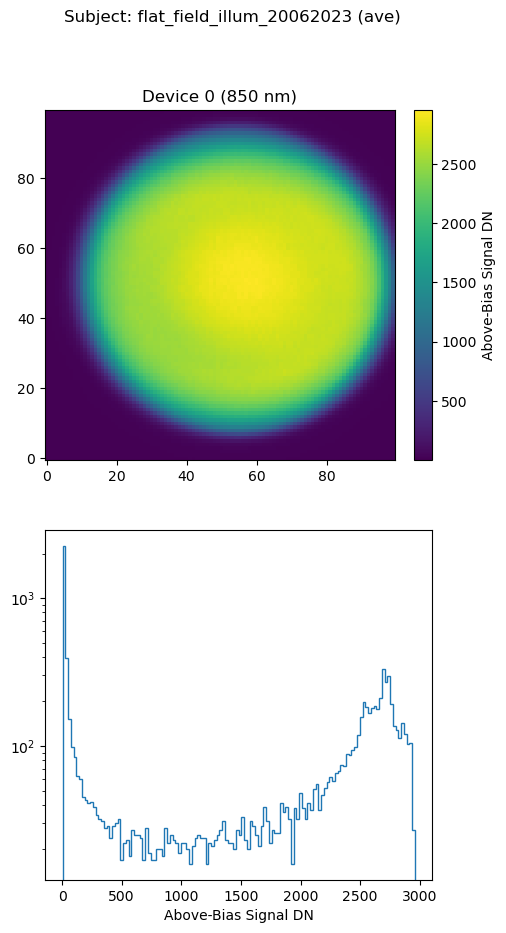

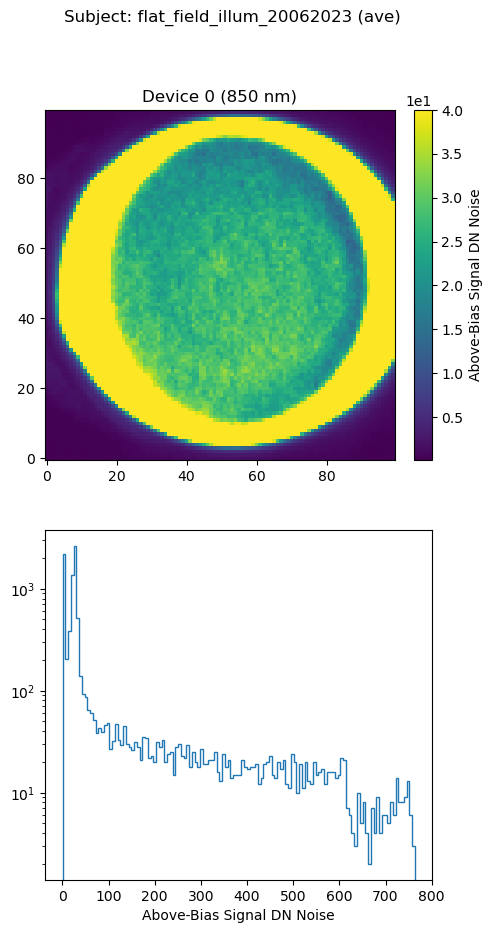

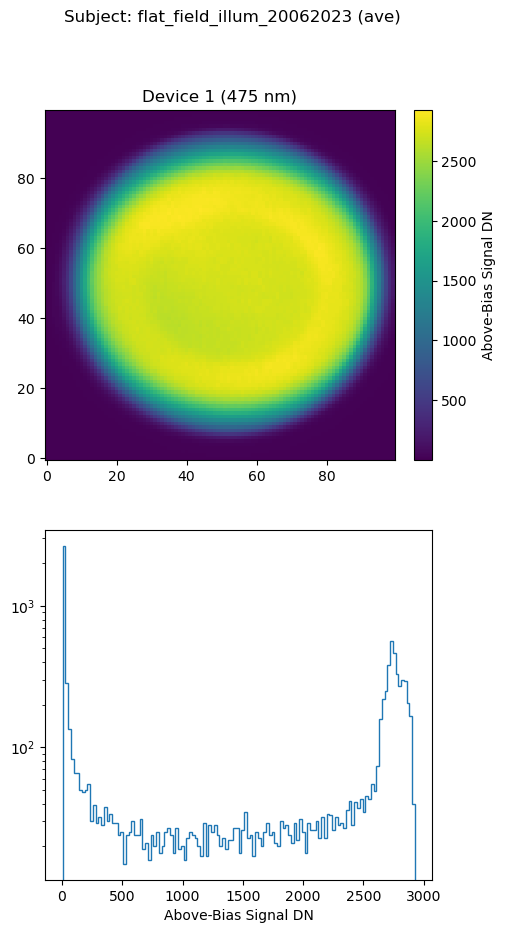

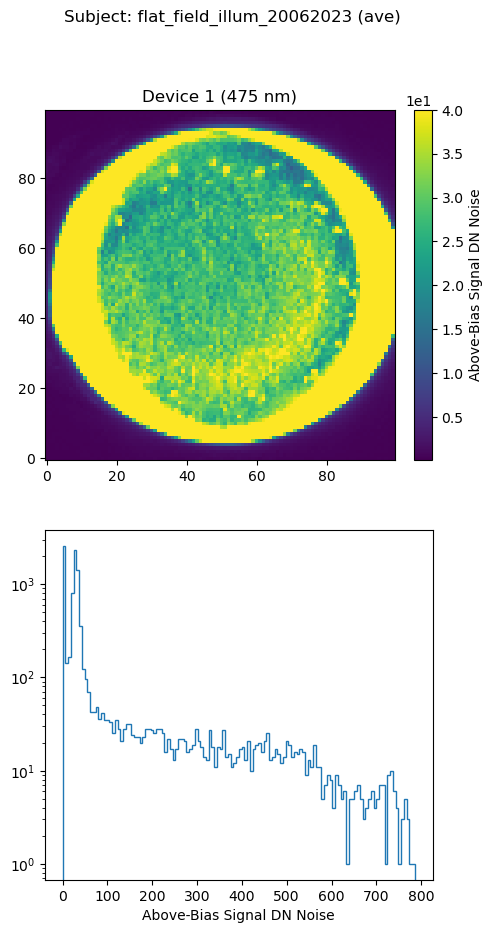

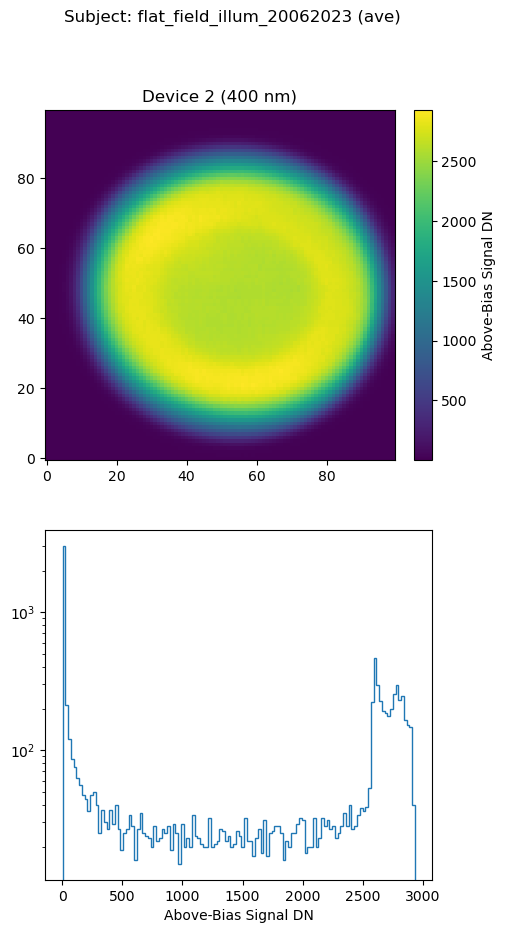

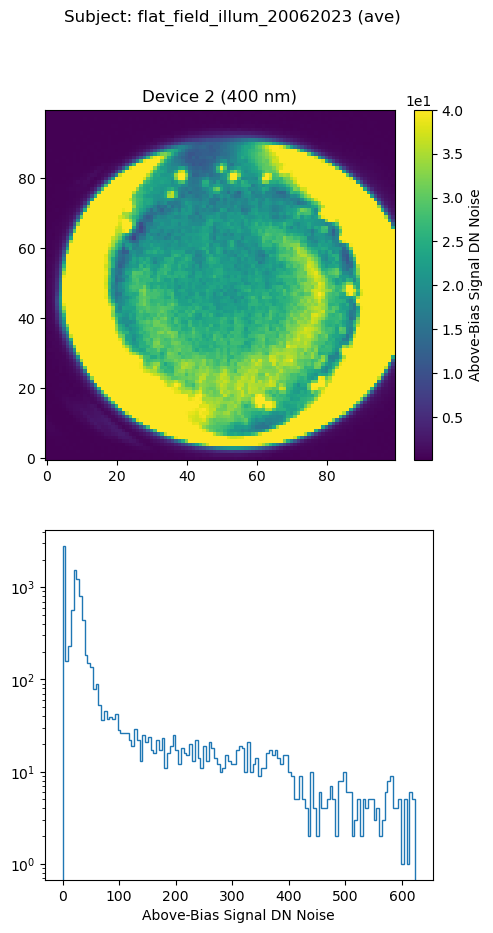

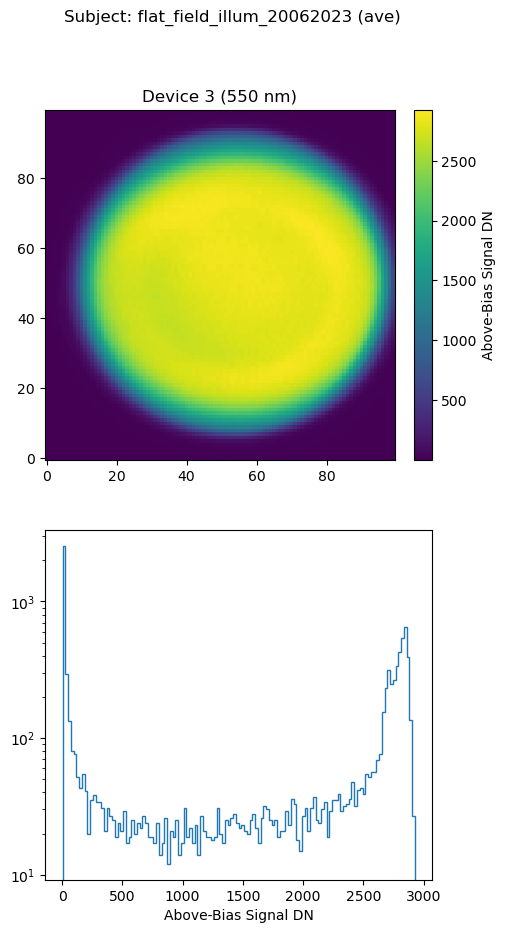

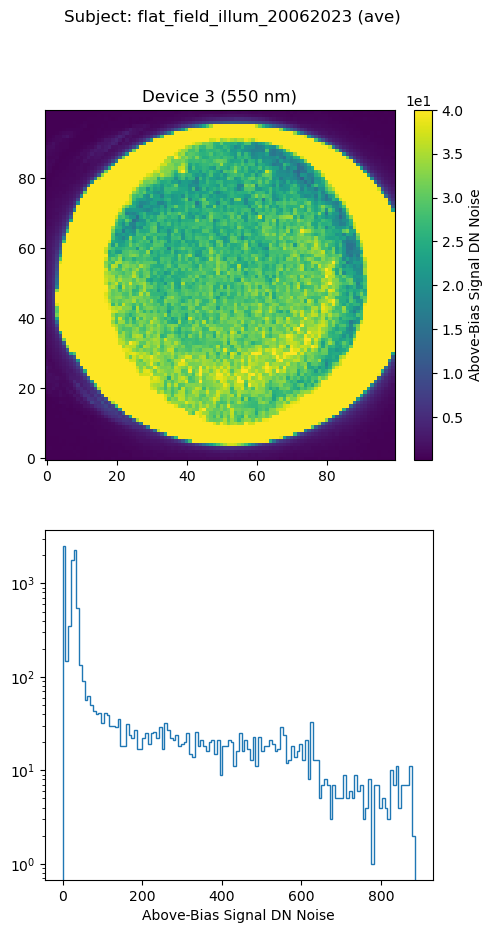

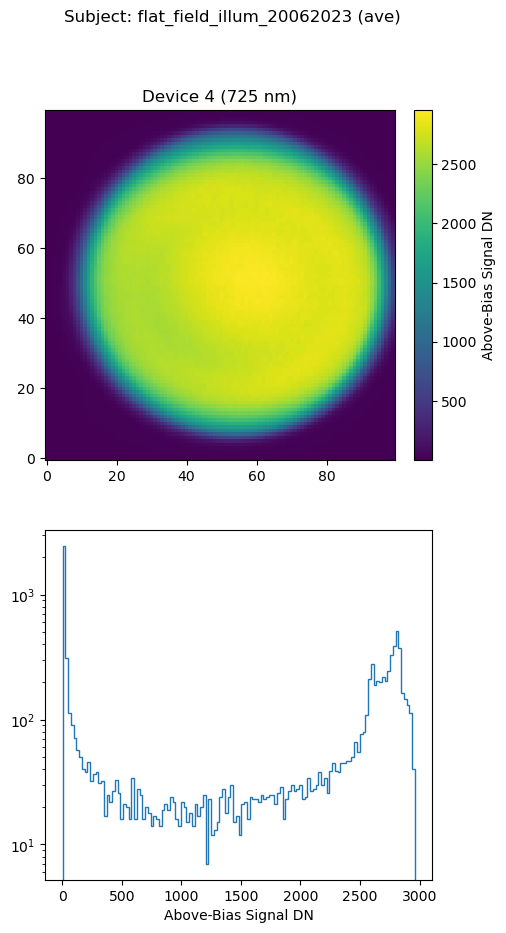

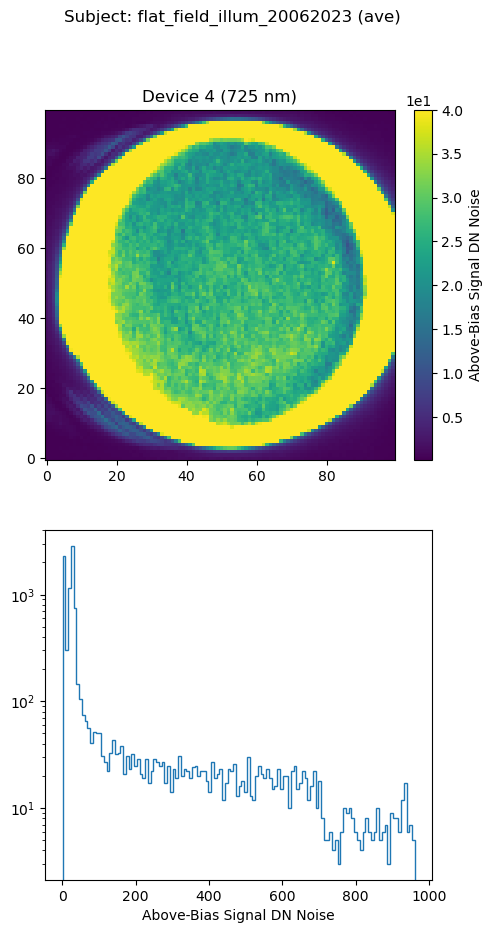

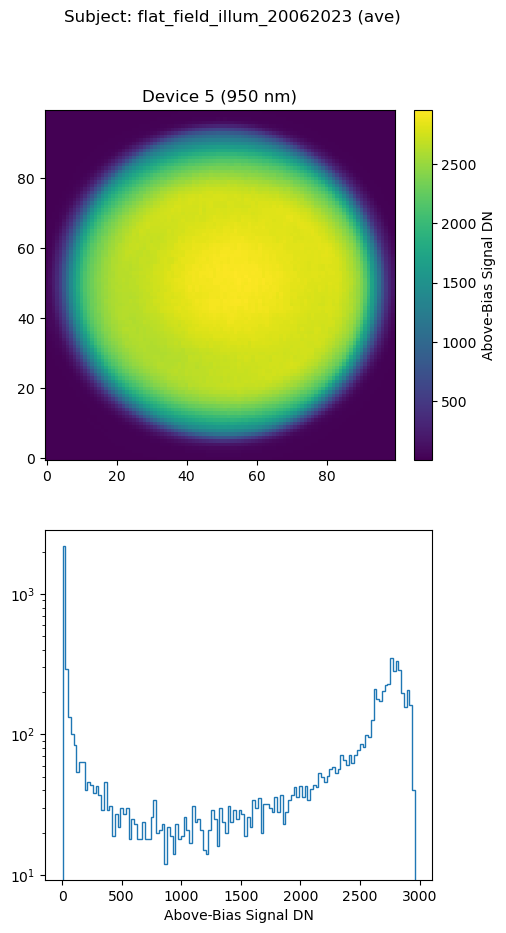

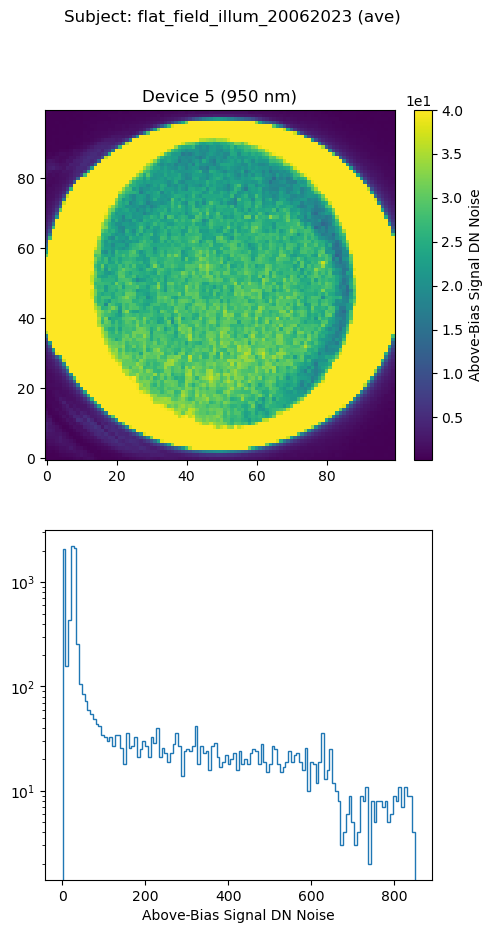

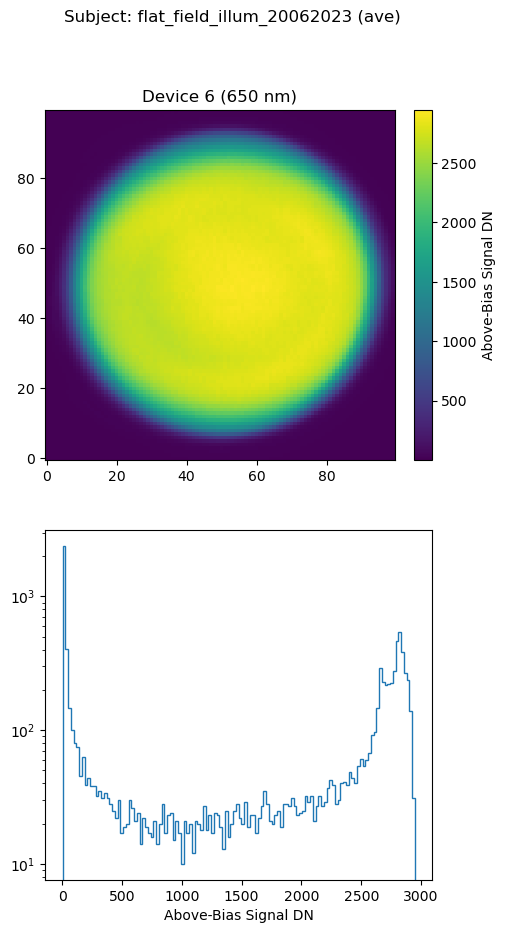

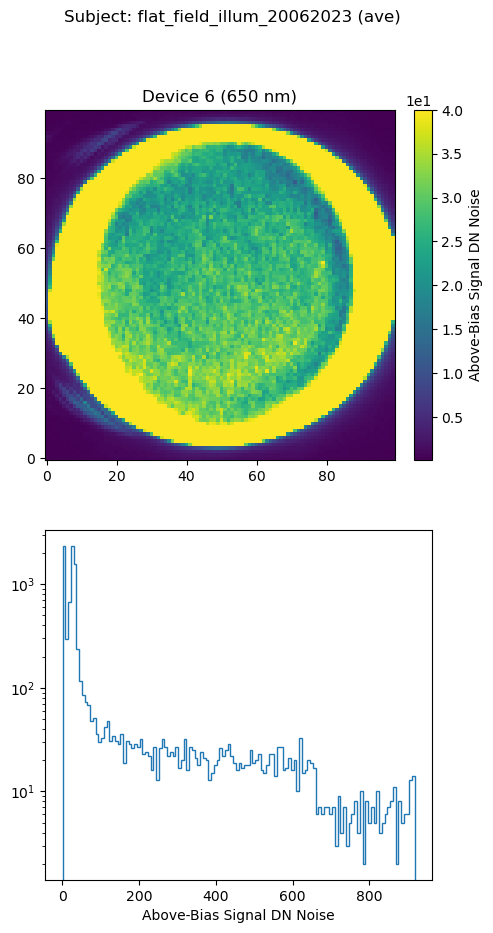

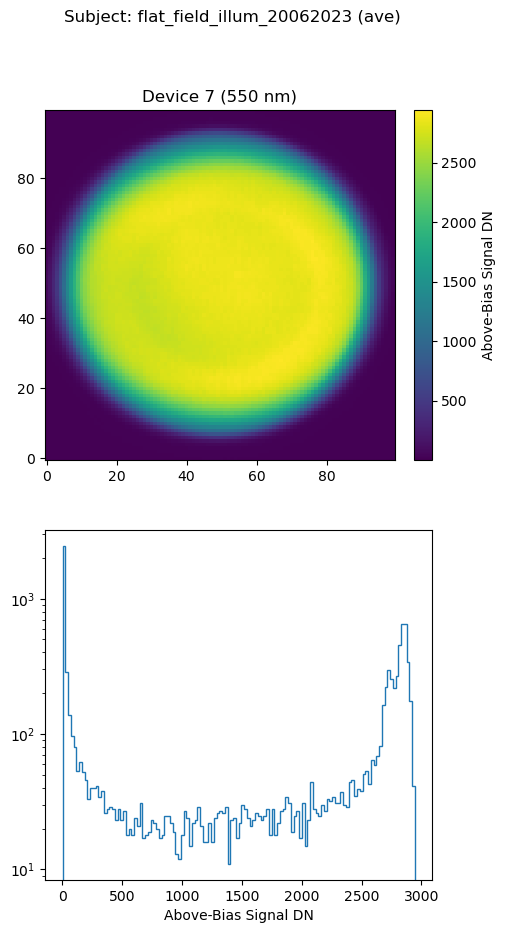

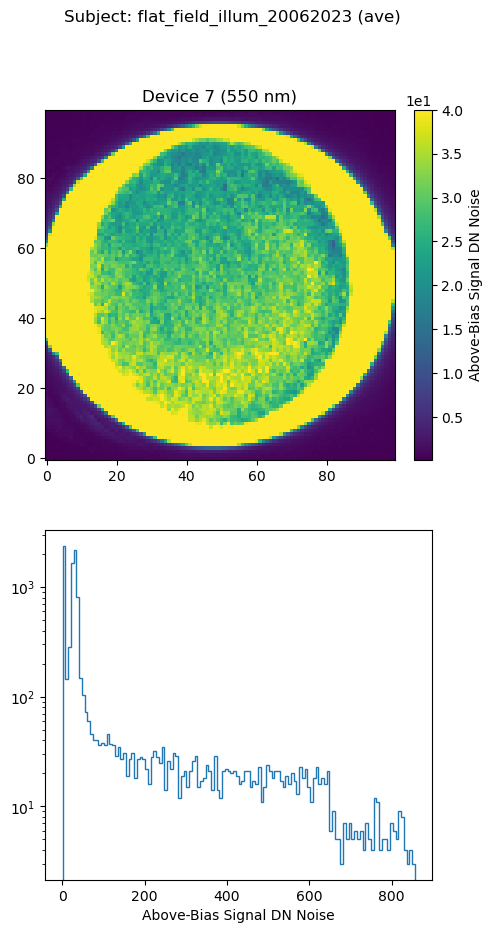

In [58]:
subject = 'flat_field_illum_20062023'
illums = sorted(list(Path('..', 'data', subject).glob('[!.]*')))
dark_subject = 'flat_field_dark_20062023'
darks = sorted(list(Path('..', 'data', dark_subject).glob('[!.]*')))
for i, channel in enumerate(illums):        
        print(darks[i])
        positions = sorted(list(Path(channel).glob('[!.]*_ave_ave.tif')))
        dark = list(Path(darks[i]).glob('[!.]*_ave_ave.tif'))[0]        
        img_1 = osp.LightImage(subject=subject, channel=channel.stem, img_type='ave')
        img_1.image_load()
        drk = osp.DarkImage(dark_subject, darks[i].stem, img_type='ave')
        drk.image_load()
        img_1.dark_subtract(drk)
        img_1.image_display()
        img_1.image_display(noise=True, vmax=40)

Here we've clipped the noise to 40 DN, i.e. ~1% of the range, to illustrate any patterns that indicated resolvable features of the spectralon surface.
We notice that in the 400 nm and 475 nm channels, there is a ring of rectangle artefacts, implying that there is some contamination of the surface that is highly reflective in these short wavelengths.
These serve to illustrate the degree to which the spectralon target was displaced during the repeat sampling.

We now investigate the success of the repeat sampling, but plotting the mean of the absolute change in average pixel level as the trials progressed.

In [59]:
subject = 'flat_field_illum_20062023'
illums = sorted(list(Path('..', 'data', subject).glob('[!.]*')))
dark_subject = 'flat_field_dark_20062023'
darks = sorted(list(Path('..', 'data', dark_subject).glob('[!.]*')))
mean_change = {}
for i, channel in enumerate(illums):        
        print(darks[i])
        positions = sorted(list(Path(channel).glob('[!.]*_ave_ave.tif')))
        dark = list(Path(darks[i]).glob('[!.]*_ave_ave.tif'))[0]        
        drk = osp.DarkImage(dark_subject, darks[i].stem, img_type='ave')
        drk.image_load()
        ave_stk = []
        for i in np.arange(1,25):
            img_1 = osp.LightImage(subject=subject, channel=channel.stem, img_type='ave')
            img_1.image_load(n_imgs = i)
            img_1.dark_subtract(drk)
            ave_stk.append(img_1.img_ave)
        # process average stack into mean of change of average
        ave_stk = np.dstack(ave_stk)
        mean_change[channel] = [np.mean(np.abs(ave_stk[40:60,40:60,i-1] - ave_stk[40:60,40:60,i])) for i in np.arange(1,24)]

../data/flat_field_dark_20062023/0_850
Loaded 1 images (ave) for: 0 (850 nm)
Loaded 1 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 2 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 3 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 4 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 5 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 6 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 7 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 8 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 9 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 10 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 11 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 12 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 

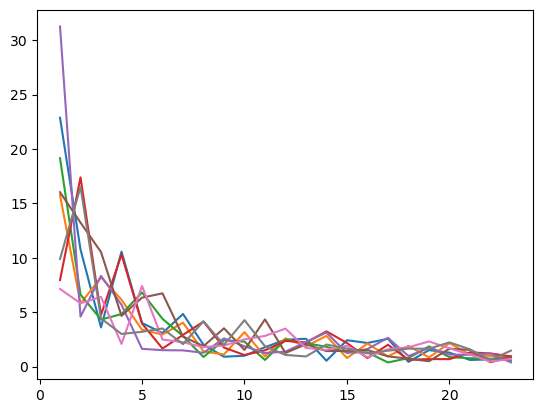

In [57]:
import matplotlib.pyplot as plt
for channel in illums:
    change = np.array(mean_change[channel])
    plt.plot(np.arange(1,24), change, label=channel.stem)

We can see that the change is converging towards 0, although this has not been reached for all channels.
This implies that a larger number of repeat trials are needed.
We could alternatively investigate using the median, instread of the mean, pixel value, to better exclude outliers in the structure of the spectralon.

In [60]:
subject = 'flat_field_illum_20062023'
illums = sorted(list(Path('..', 'data', subject).glob('[!.]*')))
dark_subject = 'flat_field_dark_20062023'
darks = sorted(list(Path('..', 'data', dark_subject).glob('[!.]*')))
mean_change = {}
for i, channel in enumerate(illums):        
        print(darks[i])
        positions = sorted(list(Path(channel).glob('[!.]*_ave_ave.tif')))
        dark = list(Path(darks[i]).glob('[!.]*_ave_ave.tif'))[0]        
        drk = osp.DarkImage(dark_subject, darks[i].stem, img_type='ave')
        drk.image_load()
        ave_stk = []
        for i in np.arange(1,25):
            img_1 = osp.LightImage(subject=subject, channel=channel.stem, img_type='ave')
            img_1.image_load(n_imgs = i, mode='median')
            img_1.dark_subtract(drk)
            ave_stk.append(img_1.img_ave)
        # process average stack into mean of change of average
        ave_stk = np.dstack(ave_stk)
        mean_change[channel] = [np.mean(np.abs(ave_stk[40:60,40:60,i-1] - ave_stk[40:60,40:60,i])) for i in np.arange(1,24)]

../data/flat_field_dark_20062023/0_850
Loaded 1 images (ave) for: 0 (850 nm)
Loaded 1 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 2 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 3 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 4 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 5 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 6 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 7 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 8 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 9 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 10 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 11 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 12 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 

[22.870102  21.658604   4.3022027  4.3022017  3.4613464  2.8660607
  3.1182544  3.118249   4.320802   3.2962005  2.3614373  2.355553
  2.3585033  1.8720032  1.8828968  1.8828974  1.8828974  1.7198999
  1.7453479  1.7453479  1.8618072  1.8339899  1.9162482]
[15.765503  10.697902   6.297104   6.057205   5.118003   4.7540026
  5.870549   4.3544507  3.4412012  3.4165058  2.8608117  2.8187072
  2.684005   2.6840057  2.3209515  2.3040514  2.204055   2.179353
  1.988498   1.9884973  2.0475519  1.9978516  1.8653516]
[19.152699  15.481407  12.129753  11.54675    3.2222936  3.2222936
  3.0554419  2.657445   4.587806   4.567901   3.5512495  3.5512586
  3.8319502  3.8301551  3.776203   3.710202   2.2743018  2.2337036
  2.615556   2.5707543  2.112311   2.008393   1.7441547]
[7.953099  7.930701  5.5812488 5.5637455 4.815195  3.8410969 3.425487
 3.4125996 3.872552  3.2323573 2.5890985 2.4819043 2.1344995 2.1345007
 2.5079048 2.208601  1.9652454 1.826142  1.8022956 1.7266065 1.6813501
 1.6597503 1.792

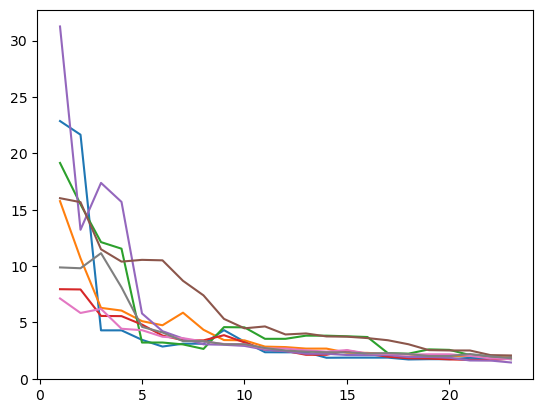

In [68]:
for channel in illums:
    change = np.array(mean_change[channel])
    print(change)
    plt.plot(np.arange(1,24), change, label=channel.stem)

This appears to show better convergence, but the convergence is to ~2 DN, rather than 0 DN. This is acceptable.

lets now consult the image results after taking the median rather than the mean - we are looking for the elimination of the rectablges in the 400 nm and 475 nm channels.

../data/flat_field_dark_20062023/0_850
Loaded 25 images (ave) for: 0 (850 nm)
Loaded 1 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
../data/flat_field_dark_20062023/1_475
Loaded 25 images (ave) for: 1 (475 nm)
Loaded 1 images (ave) for: 1 (475 nm)
Subtracting dark frame for: 1 (475 nm)
../data/flat_field_dark_20062023/2_400
Loaded 25 images (ave) for: 2 (400 nm)
Loaded 1 images (ave) for: 2 (400 nm)
Subtracting dark frame for: 2 (400 nm)
../data/flat_field_dark_20062023/3_550
Loaded 25 images (ave) for: 3 (550 nm)
Loaded 1 images (ave) for: 3 (550 nm)
Subtracting dark frame for: 3 (550 nm)
../data/flat_field_dark_20062023/4_725
Loaded 25 images (ave) for: 4 (725 nm)
Loaded 1 images (ave) for: 4 (725 nm)
Subtracting dark frame for: 4 (725 nm)
../data/flat_field_dark_20062023/5_950
Loaded 25 images (ave) for: 5 (950 nm)
Loaded 1 images (ave) for: 5 (950 nm)
Subtracting dark frame for: 5 (950 nm)
../data/flat_field_dark_20062023/6_650
Loaded 25 images (ave) for: 6 (

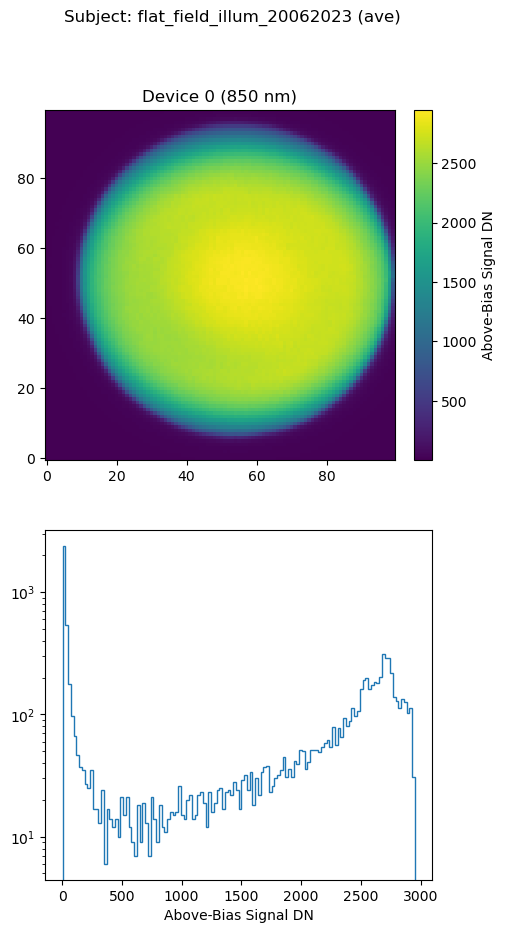

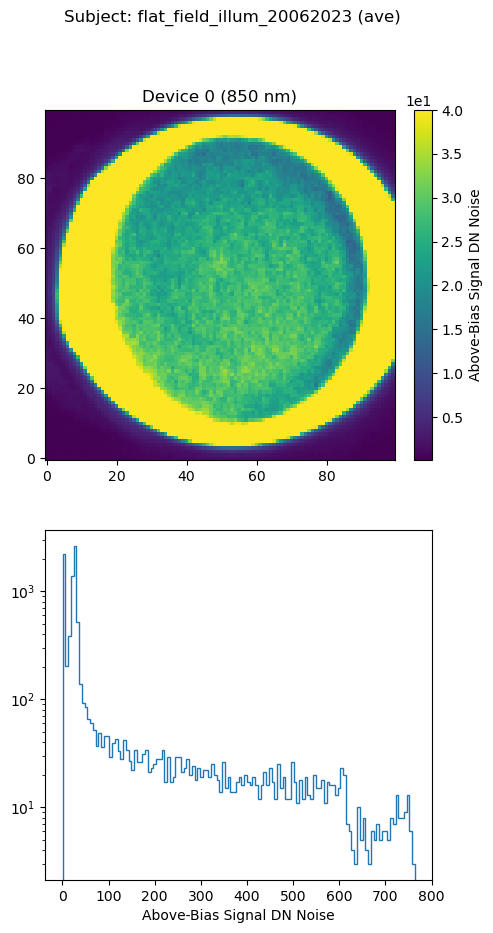

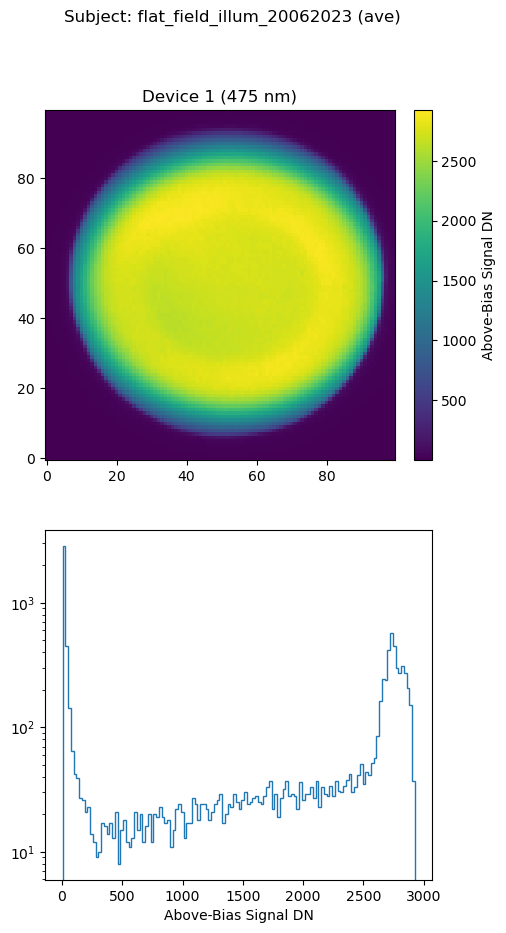

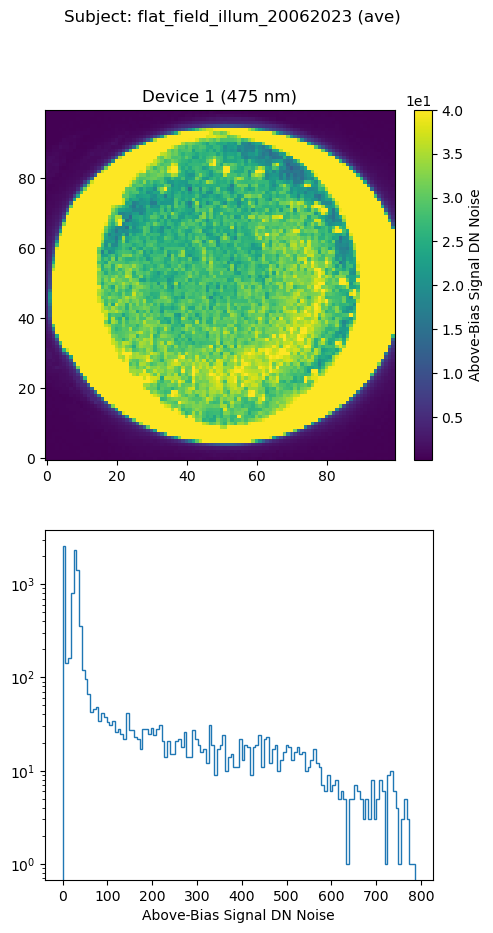

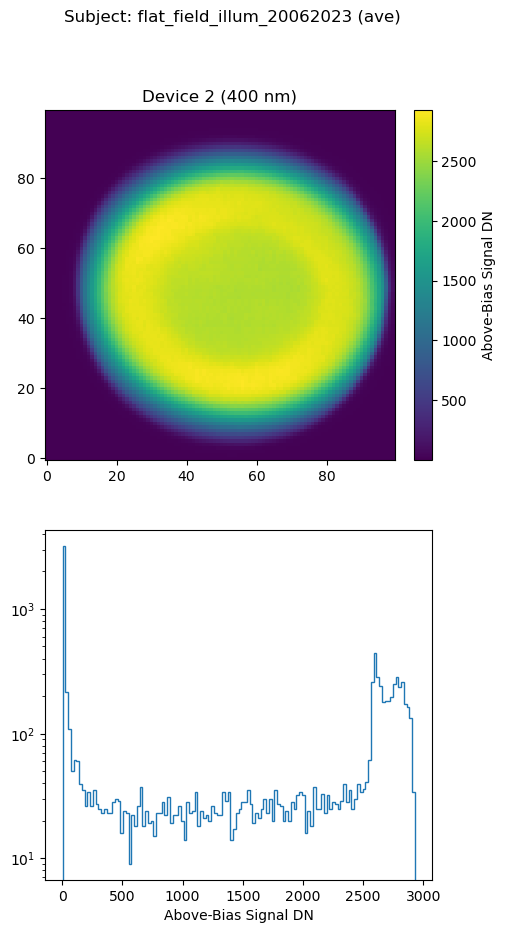

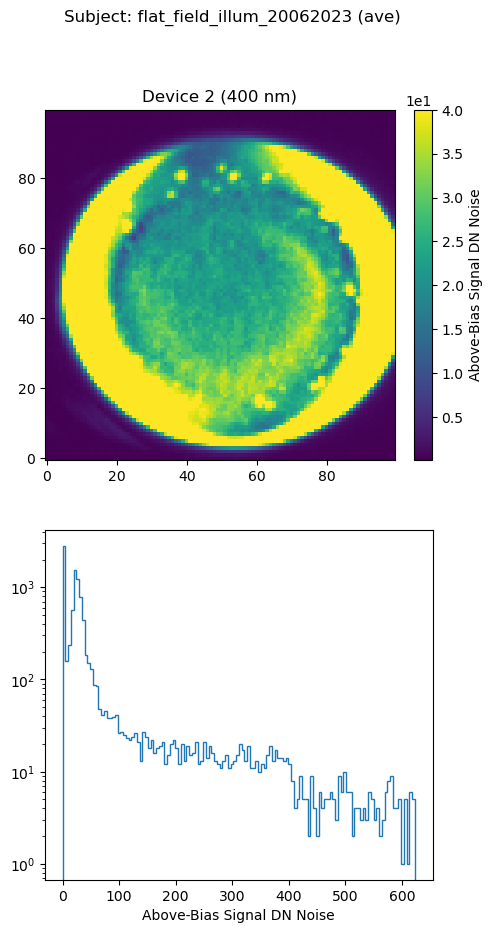

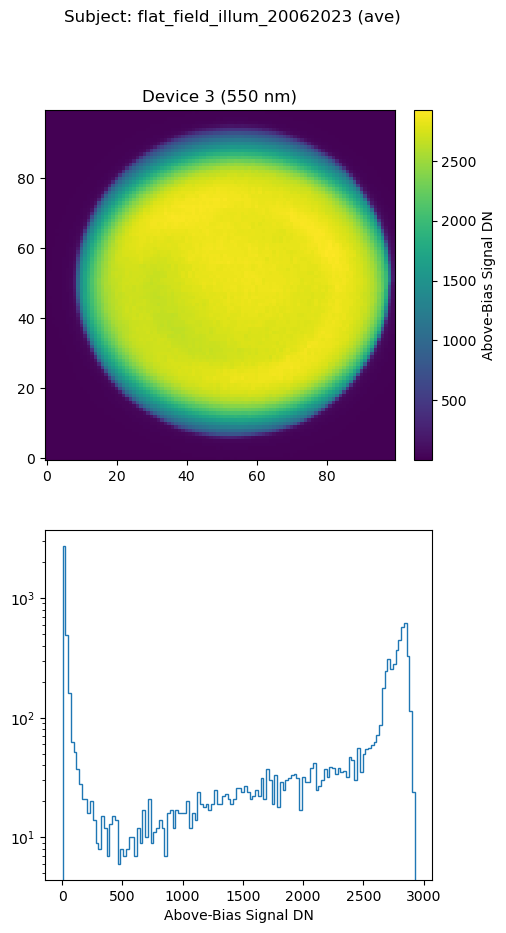

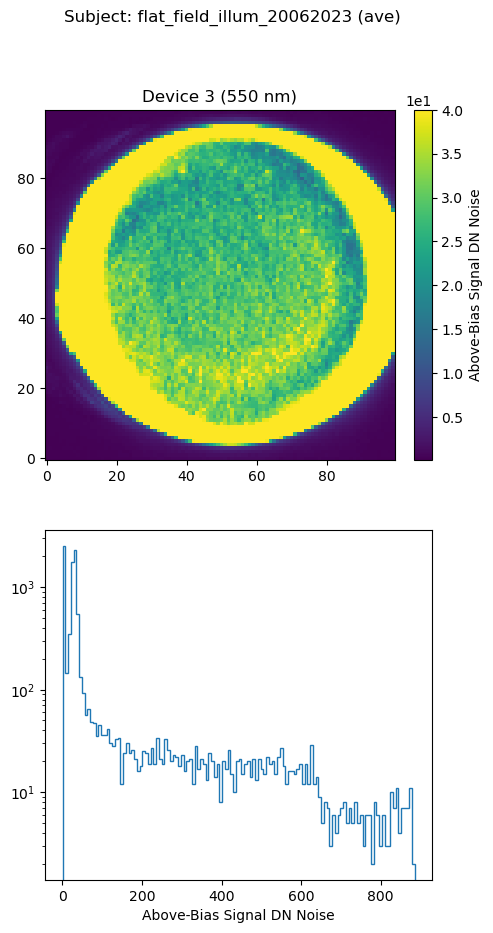

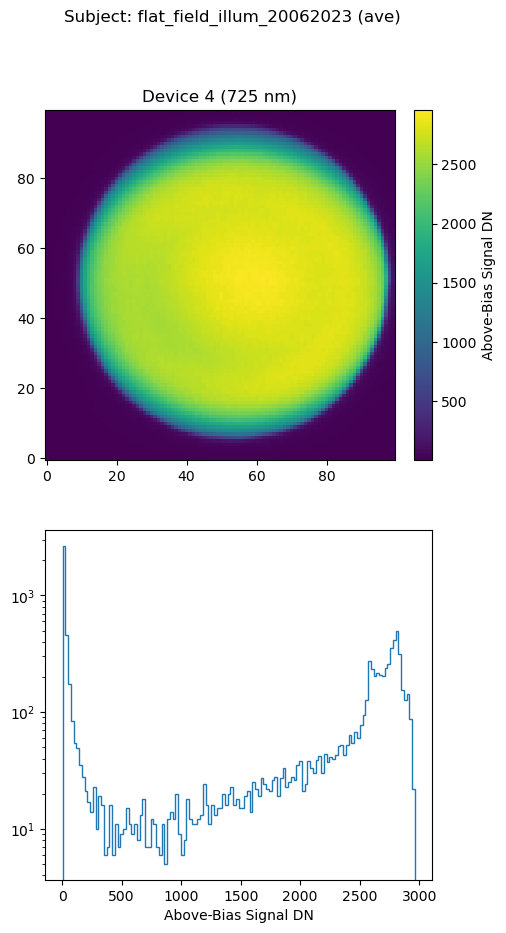

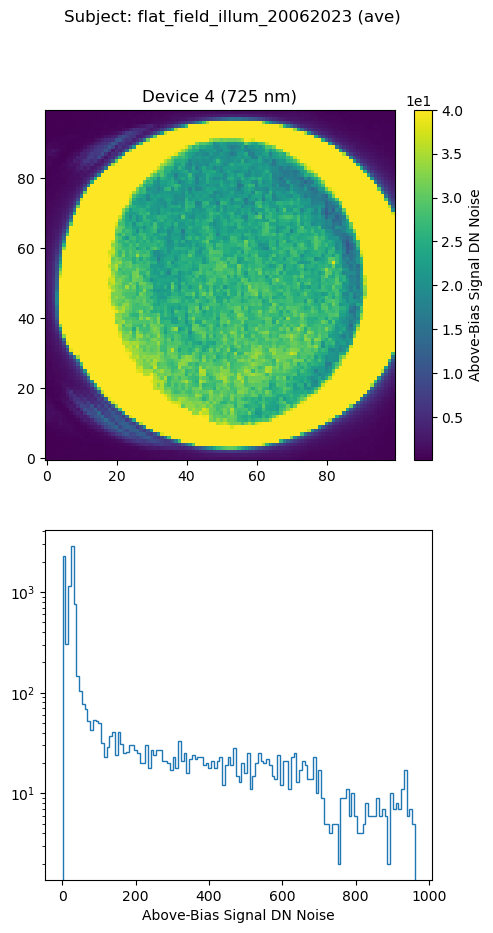

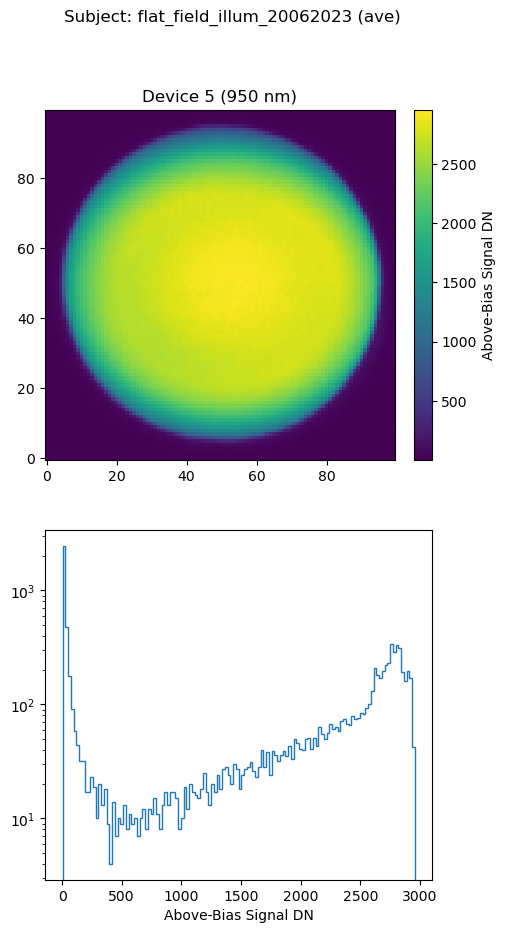

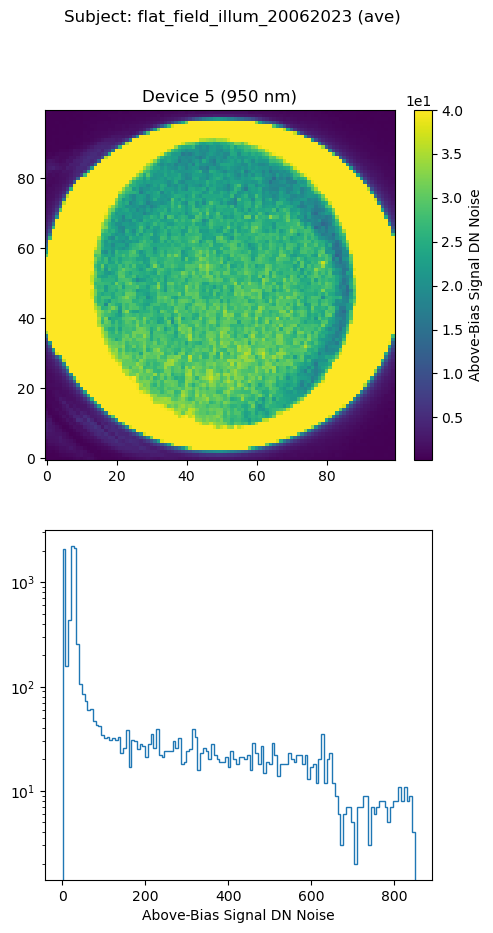

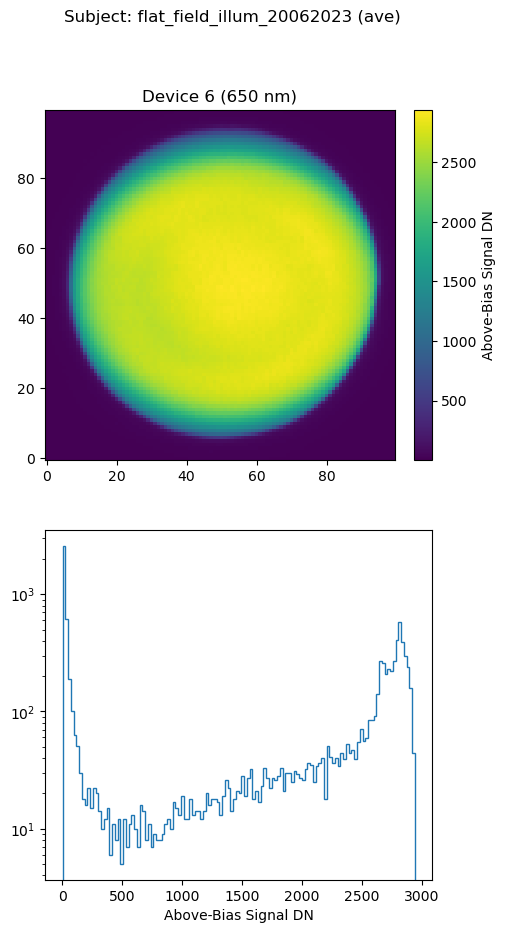

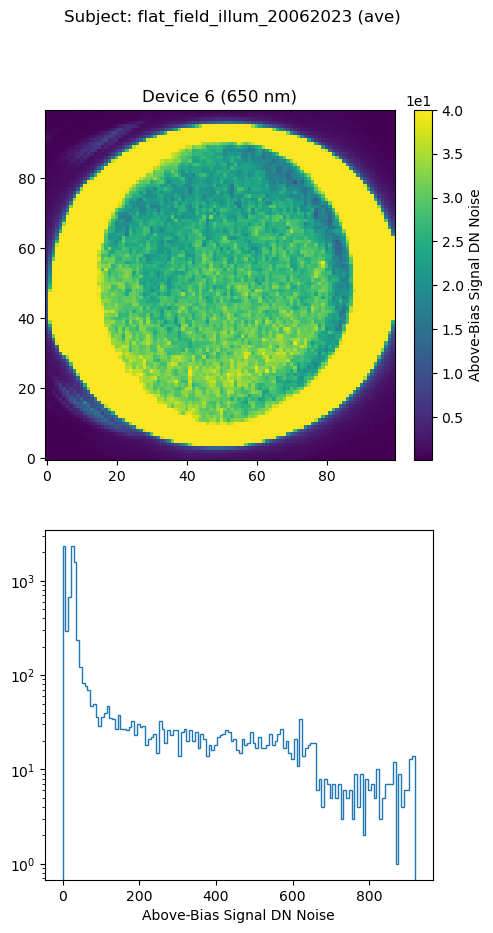

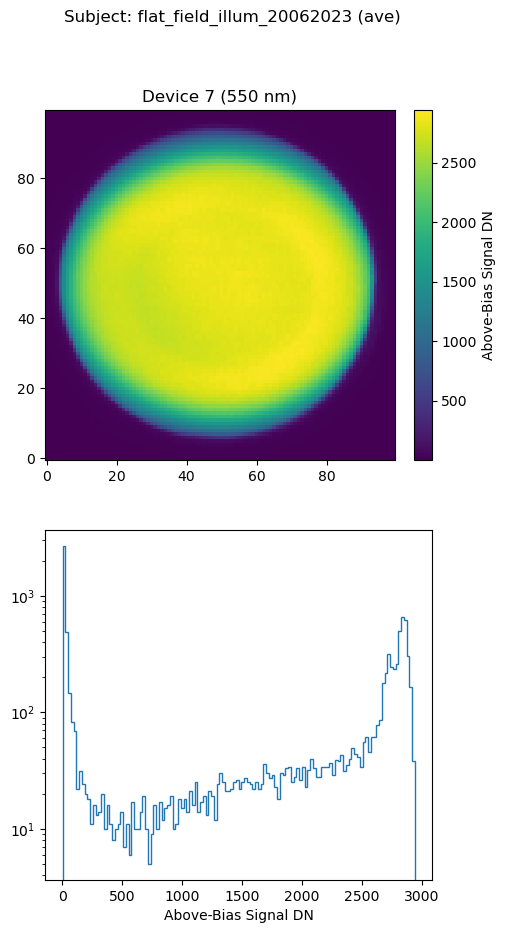

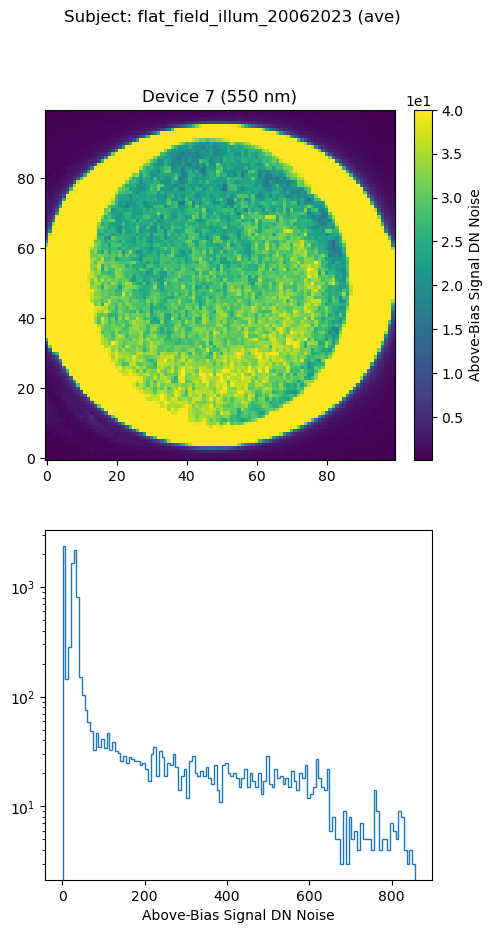

In [69]:
subject = 'flat_field_illum_20062023'
illums = sorted(list(Path('..', 'data', subject).glob('[!.]*')))
dark_subject = 'flat_field_dark_20062023'
darks = sorted(list(Path('..', 'data', dark_subject).glob('[!.]*')))
for i, channel in enumerate(illums):        
        print(darks[i])
        positions = sorted(list(Path(channel).glob('[!.]*_ave_ave.tif')))
        dark = list(Path(darks[i]).glob('[!.]*_ave_ave.tif'))[0]        
        img_1 = osp.LightImage(subject=subject, channel=channel.stem, img_type='ave')
        img_1.image_load(mode='median')
        drk = osp.DarkImage(dark_subject, darks[i].stem, img_type='ave')
        drk.image_load()
        img_1.dark_subtract(drk)
        img_1.image_display()
        img_1.image_display(noise=True, vmax=40)

Of course, the artefacts are still present, as taking the median does not change the computation of the standard deviation.

In conclusion, the median is the right score to use, as it best handles the occurance of stucture in the spectralon.

# After Processing

Now what to do with this data and information?

We would like to use these frames to apply illumination and instrument nonuniformity corrections.

This needs to be baked into a new reflectance processing pipeline, where we now take the mean reflectance across the region of interest, after these flat field frames have been applied, and use these to compute the reflectance across the image, as opposed to finding the relfectance correction coefficient for each pixel individually.

So now I need to normalise these frames, to the mean value of the central region, and save these as the flat-fields.

../data/flat_field_dark_20062023/0_850
Loaded 25 images (ave) for: 0 (850 nm)
Loaded 1 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
../data/flat_fields_20062023/0_850
Mean image written to ../data/flat_fields_20062023/0_850/850_mean_flat_field.tif
Error image written to ../data/flat_fields_20062023/0_850/850_error_flat_field.tif
../data/flat_field_dark_20062023/1_475
Loaded 25 images (ave) for: 1 (475 nm)
Loaded 1 images (ave) for: 1 (475 nm)
Subtracting dark frame for: 1 (475 nm)
../data/flat_fields_20062023/1_475
Mean image written to ../data/flat_fields_20062023/1_475/475_mean_flat_field.tif
Error image written to ../data/flat_fields_20062023/1_475/475_error_flat_field.tif
../data/flat_field_dark_20062023/2_400
Loaded 25 images (ave) for: 2 (400 nm)
Loaded 1 images (ave) for: 2 (400 nm)
Subtracting dark frame for: 2 (400 nm)
../data/flat_fields_20062023/2_400
Mean image written to ../data/flat_fields_20062023/2_400/400_mean_flat_field.tif
Error image written t

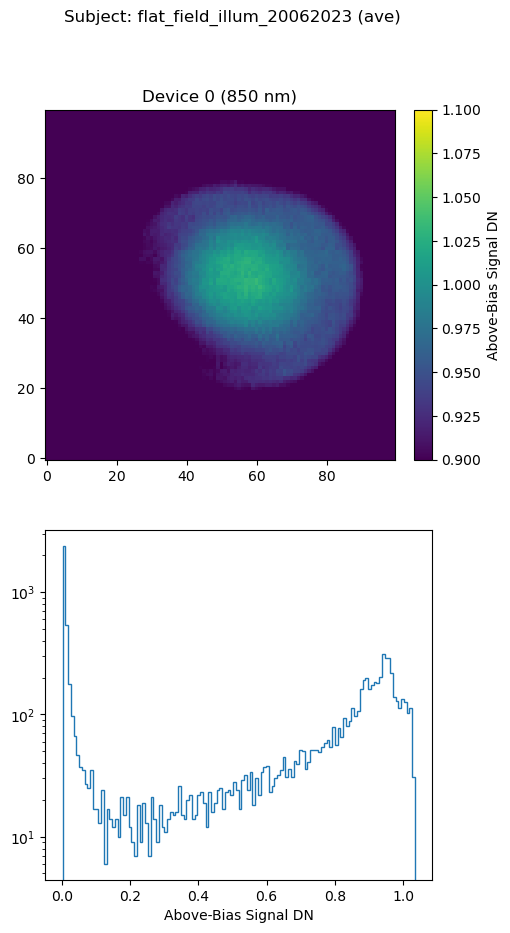

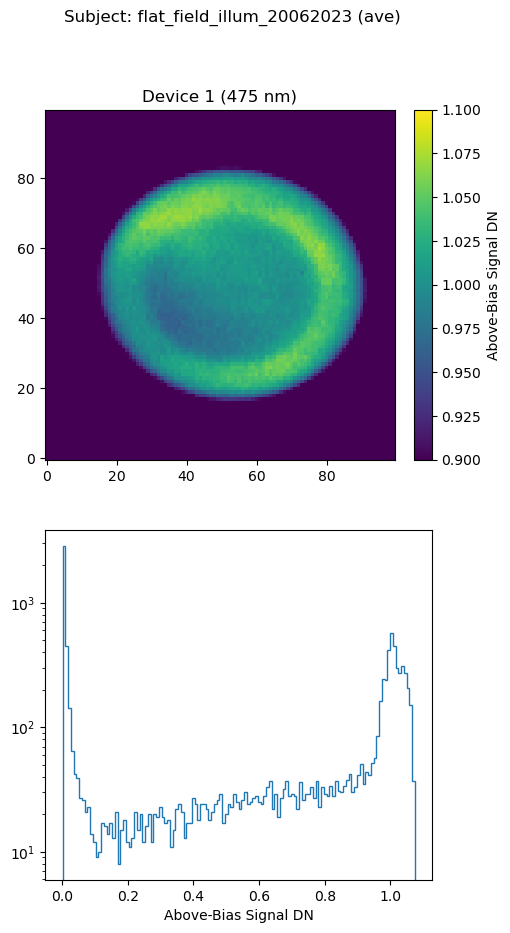

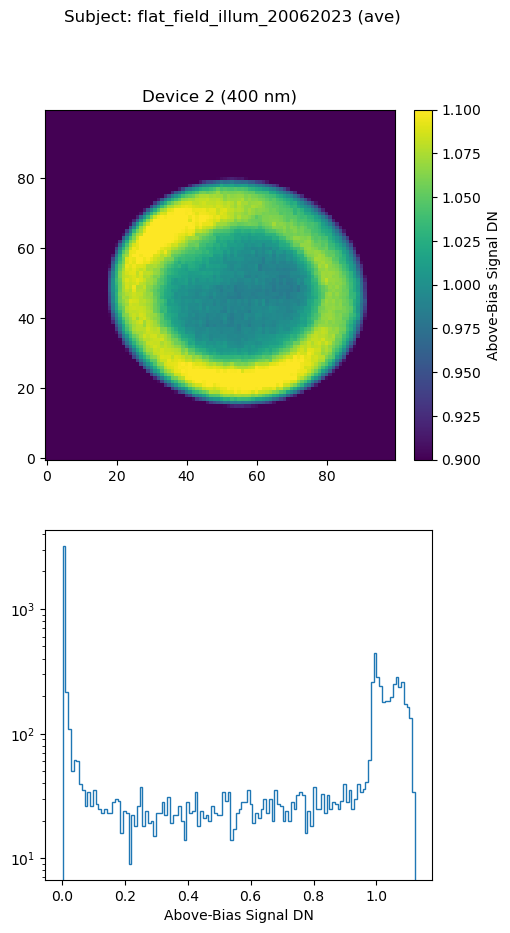

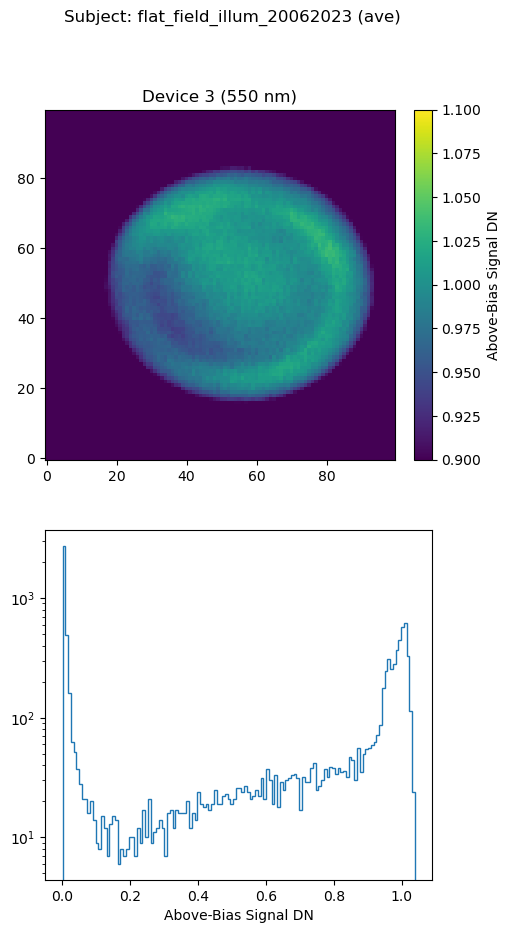

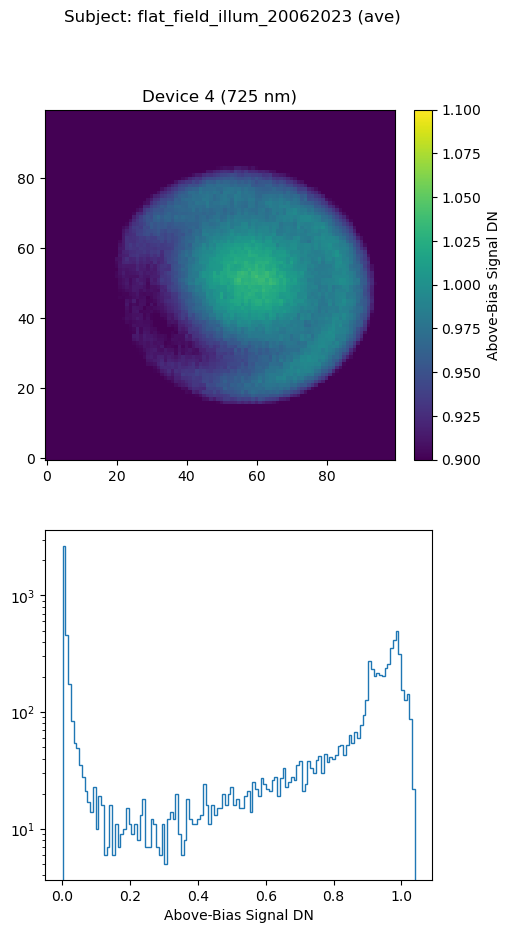

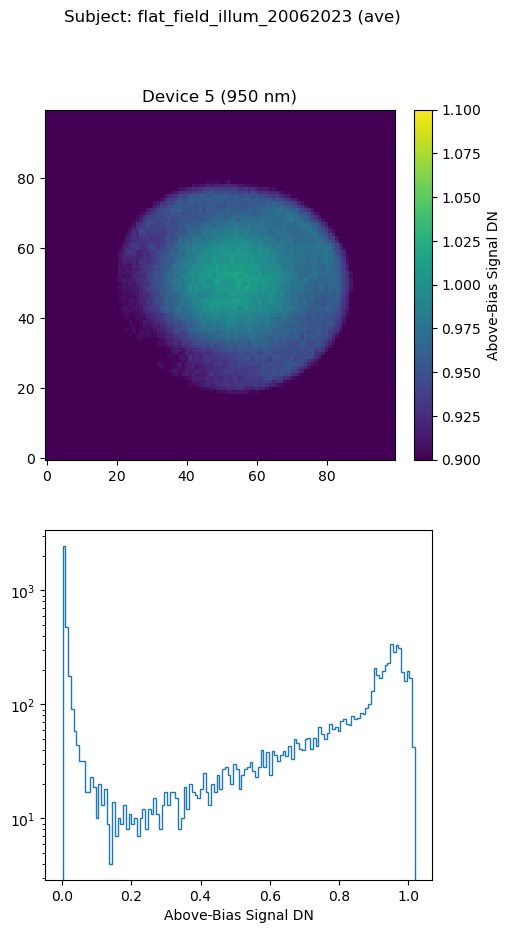

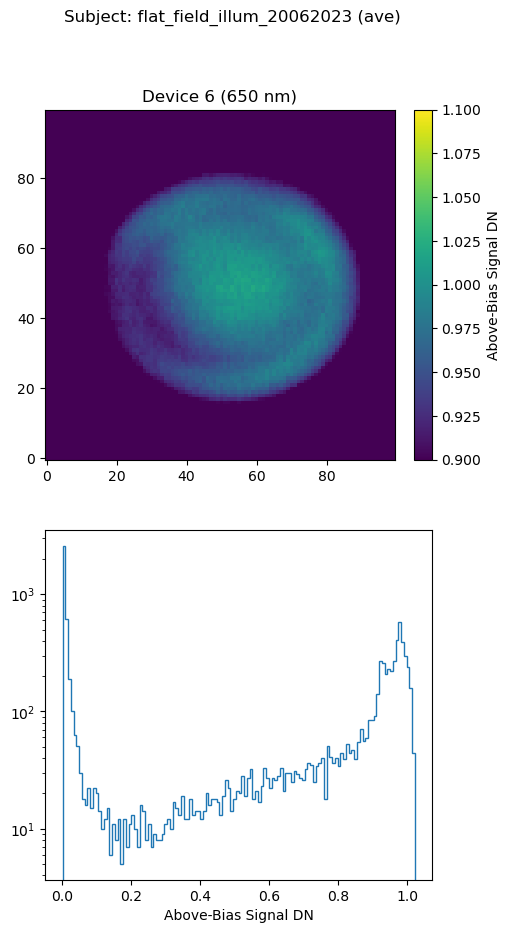

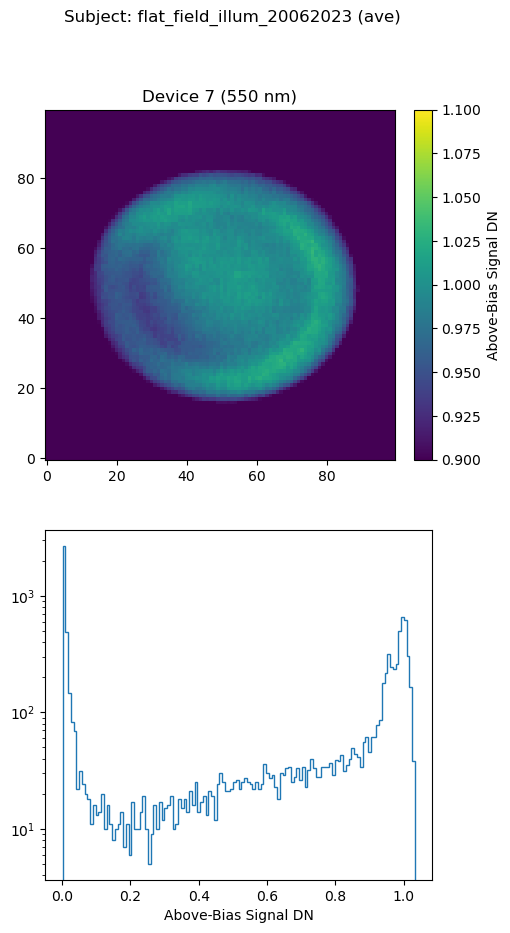

In [72]:
subject = 'flat_field_illum_20062023'
illums = sorted(list(Path('..', 'data', subject).glob('[!.]*')))
dark_subject = 'flat_field_dark_20062023'
darks = sorted(list(Path('..', 'data', dark_subject).glob('[!.]*')))
for i, channel in enumerate(illums):        
        print(darks[i])
        positions = sorted(list(Path(channel).glob('[!.]*_ave_ave.tif')))
        dark = list(Path(darks[i]).glob('[!.]*_ave_ave.tif'))[0]        
        img_1 = osp.LightImage(subject=subject, channel=channel.stem, img_type='ave')
        img_1.image_load(mode='median')
        drk = osp.DarkImage(dark_subject, darks[i].stem, img_type='ave')
        drk.image_load()
        img_1.dark_subtract(drk)
        img_1.img_ave = img_1.img_ave / np.mean(img_1.img_ave[40:60,40:60])
        img_1.image_display(vmin=0.9, vmax=1.1)        
        img_1.img_type = 'flat_field'
        img_1.dir = Path('..', 'data', 'flat_fields_20062023', channel.stem)
        img_1.dir.mkdir(parents=True, exist_ok=True)
        img_1.save_tiff()

This completes the flat-fielding process.